In [ ]:
import tensorflow as tf


In [ ]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, AveragePooling2D

In [ ]:
model = Sequential()

In [ ]:
#define architecture of linet 5

model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(16,kernel_size= (5,5), padding = 'valid', activation='sigmoid',))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid' ))
model.add(Conv2D(32,kernel_size= (5,5), padding = 'valid', activation='sigmoid',))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid' ))
model.add(Flatten())
model.add(Dense(units = 120, activation='sigmoid'))
model.add(Dense(units = 84, activation='sigmoid'))
model.add(Dense(units = 10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 32)            │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          61,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,822 (335.24 KB)

 Trainable params: 85,822 (335.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#resize to 28,28 if not in same size
x_train[0].shape

(28, 28)

In [ ]:
#rescaling the pixel values
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#reshape the channel
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
# one hot encoded labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# train the model on the data
model.fit(x_train, y_train,batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6117 - loss: 1.1670 - val_accuracy: 0.9500 - val_loss: 0.1747
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9540 - loss: 0.1515 - val_accuracy: 0.9737 - val_loss: 0.0850
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9721 - loss: 0.0930 - val_accuracy: 0.9803 - val_loss: 0.0617
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9807 - val_loss: 0.0597
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.9849 - val_loss: 0.0460
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0467 - val_accuracy: 0.9867 - val_loss: 0.0423
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9833 - val_loss: 0.0548
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0365 -

Predicting the Output and Accuracy

Based on the output, the model seems to be performing well and achieving high accuracy on both the training and validation sets.

Accuracy: The validation accuracy (val_accuracy) is a good indicator of how well the model is likely to perform on unseen data. In this case, the validation accuracy is increasing and reaching around 98-99% in the later epochs.
Loss: The validation loss (val_loss) is also decreasing, which is a good sign. A lower validation loss generally indicates better generalization performance.
Prediction

Based on the trend of increasing validation accuracy and decreasing validation loss, it is likely that the model will achieve a final accuracy of around 98-99% on unseen data. The exact accuracy might vary slightly, but it is expected to be in this range.

Important Considerations

Overfitting: If the training accuracy continues to increase while the validation accuracy plateaus or starts to decrease, it might be a sign of overfitting. Overfitting means the model is memorizing the training data too well and not generalizing well to new data.
Early Stopping: You can use early stopping to prevent overfitting. Early stopping monitors the validation loss and stops training when the validation loss stops improving.

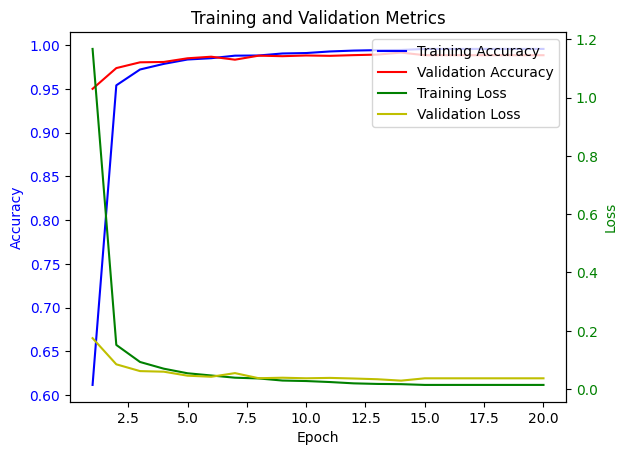

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the output (same as before)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
accuracy = [0.6117, 0.9540, 0.9721, 0.9785, 0.9835, 0.9850, 0.9879, 0.9881, 0.9904, 0.9909, 0.9927, 0.9937, 0.9942, 0.9944, 0.9956, 0.9956, 0.9956, 0.9956, 0.9956, 0.9956]
val_accuracy = [0.9500, 0.9737, 0.9803, 0.9807, 0.9849, 0.9867, 0.9833, 0.9879, 0.9873, 0.9881, 0.9877, 0.9885, 0.9891, 0.9914, 0.9884, 0.9884, 0.9884, 0.9884, 0.9884, 0.9884]
loss = [1.1670, 0.1515, 0.0930, 0.0700, 0.0543, 0.0467, 0.0391, 0.0365, 0.0293, 0.0276, 0.0242, 0.0197, 0.0177, 0.0169, 0.0143, 0.0143, 0.0143, 0.0143, 0.0143, 0.0143]
val_loss = [0.1747, 0.0850, 0.0617, 0.0597, 0.0460, 0.0423, 0.0548, 0.0373, 0.0390, 0.0371, 0.0384, 0.0363, 0.0338, 0.0290, 0.037, 0.037, 0.037, 0.037, 0.037, 0.037]

# Create the plot
fig, ax1 = plt.subplots()

# Plot accuracy on the primary y-axis
ax1.plot(epochs, accuracy, 'b-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', labelcolor='b')

# Create a secondary y-axis for loss
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'g-', label='Training Loss')
ax2.plot(epochs, val_loss, 'y-', label='Validation Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params('y', labelcolor='g')

# Add title and legend
plt.title('Training and Validation Metrics')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)  # Adjust legend position

plt.show()

## AlexNet: https://en.wikipedia.org/wiki/AlexNet

In [ ]:
#train the mnist data on AlexNet
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#add channel dimension
x_train = tf.expand_dims(x_train.astype('float32'), axis=-1)/255.0
x_test = tf.expand_dims(x_test.astype('float32'), axis=-1)/255.0

# Reshape using tf.reshape
x_train = tf.reshape(x_train, [-1,28,28,1]) # Use tf.reshape instead of x_train.reshape
x_test = tf.reshape(x_test, [-1,28,28,1])  # Use tf.reshape instead of x_test.reshape


#resize the model
x_train = tf.image.resize(x_train, (227, 227))
x_test = tf.image.resize(x_test, (227, 227))

#one hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)